[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AIForVet/aiml/blob/main/02C-data-sets-coco.ipynb)

# COCO Dataset

Sure! Here's a simple Jupyter Notebook exercise for students using the COCO (Common Objects in Context) dataset. This exercise will help them get familiar with loading and visualizing images and annotations from the dataset.



## Exercise: Exploring the COCO Dataset

### Objective:
Load the COCO dataset.
Visualize images and their corresponding annotations.



### Prerequisites:
Install the pycocotools library.
Download the COCO dataset (e.g., 2017 Train/Val images and annotations).

### Step 1: Install Required Libraries



In [1]:
%pip install pycocotools

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\Mejkerslab\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### Step 2: Import Libraries



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
import requests
from PIL import Image
from io import BytesIO

### Step 3: Load the COCO Dataset

In [19]:
import os

# Path to the COCO annotations file
annFile_url = 'https://github.com/AIForVet/aiml/raw/refs/heads/main/annotations/instances_train2017.json'
annFile_local = 'instances_train2017.json'

# Download the annotations file if it does not exist
if not os.path.exists(annFile_local):
	response = requests.get(annFile_url)
	with open(annFile_local, 'wb') as f:
		f.write(response.content)

# Initialize COCO api for instance annotations
coco = COCO(annFile_local)

loading annotations into memory...


JSONDecodeError: Expecting value: line 9 column 1 (char 8)

### Step 4: Load and Display random Image:



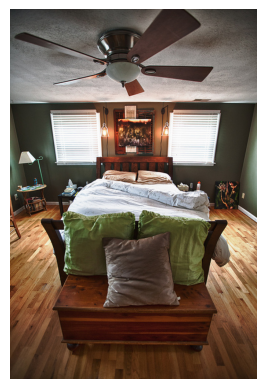

In [6]:
# Get image ids
imgIds = coco.getImgIds()

# Select a random image
img = coco.loadImgs(imgIds[np.random.randint(0, len(imgIds))])[0]

# Load and display the image
img_url = img['coco_url']
response = requests.get(img_url)
img_data = Image.open(BytesIO(response.content))
plt.imshow(img_data)
plt.axis('off')
plt.show()

### Step 5: Load and Display Annotations



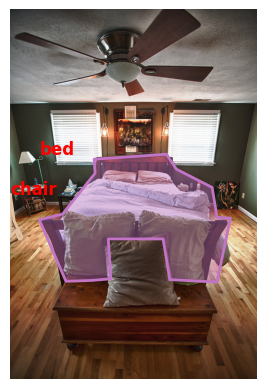

In [9]:
# Load and display annotations
annIds = coco.getAnnIds(imgIds=img['id'], iscrowd=False)
anns = coco.loadAnns(annIds)

# Display annotations
plt.imshow(img_data)
plt.axis('off')
coco.showAnns(anns)
# display text for annotations
for ann in anns:
    bbox = ann['bbox']
    plt.text(bbox[0], bbox[1], coco.loadCats(ann['category_id'])[0]['name'], color='red', fontsize=12, weight='bold')
plt.show()

### Instructions for Students
1. Follow the steps to install the required libraries and load the COCO dataset.
2. Modify the code to display multiple images and their annotations.
3. Explore different categories and visualize images belonging to specific categories.

